In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D,Dropout, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from matplotlib.pyplot import imshow
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import keras.backend as K
#from K import argmax

Using TensorFlow backend.


In [2]:
import IPython.display as display
from PIL import Image
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy

In [3]:
#Read the Labels CSV
df = pd.read_csv('label.csv')
df.head()

,Ind,Value
0,digit_0,1
1,digit_1,4
2,digit_2,2
3,digit_3,3
4,digit_4,1


In [4]:
#Importing Images
import cv2
import glob
image_list = []
for filename in sorted(glob.glob('Images/*.jpg'), key=lambda a: int(a.split("_")[-1].split('.')[0]))[:]: 
    im=cv2.imread(filename)
    image_list.append(im)

(28, 25, 3)

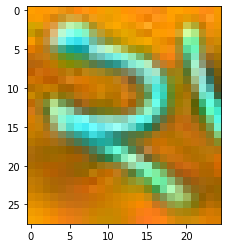

In [5]:
plt.imshow(image_list[2])
image_list[2].shape

In [6]:
#OneHotEncoding y
y = pd.get_dummies(df.Value)
y.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [7]:
#Resizing image to 38*25*3
for i in range(len(image_list)):
    image_list[i] = cv2.resize(image_list[i], (38, 25)) 
    
image_list_arr = np.array(image_list)

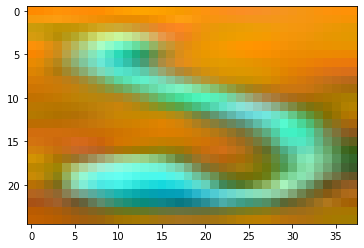

In [8]:
plt.imshow(image_list_arr[0])

In [9]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_list_arr, y, test_size=0.2, random_state=0)

In [10]:
#Normalizing X
X_train = x_train/255.
X_test = x_test/255.
#Printing Shapes of all Dataset
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 1114
number of test examples = 279
X_train shape: (1114, 25, 38, 3)
Y_train shape: (1114, 10)
X_test shape: (279, 25, 38, 3)
Y_test shape: (279, 10)


In [11]:
import keras
def BDRW(input_shape):
    X_input = Input(shape=input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((4, 4))(X_input)
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (5,5), strides = (1, 1), name = 'conv0')(X) 
    #X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
    
    X = Conv2D(32, (3,3), strides = (1, 1), name = 'conv1')(X) 
    X = MaxPooling2D(pool_size=(2, 2))(X)
    X = Activation('relu')(X)
    # FLATTEN X 
    X = Flatten()(X)
    X = Dense(64, activation='sigmoid')(X)
    X = Dropout(0.3)(X)
    X = Dense(10, activation='softmax', name='fc')(X)
    
    model = keras.Model(inputs = X_input, outputs = X, name='BDRW')
    return model

In [12]:
model = BDRW(input_shape = (25, 38, 3))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "BDRW"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 25, 38, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 33, 46, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 29, 42, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 29, 42, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 21, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 12, 19, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 9, 32)          0      

In [13]:
model.fit(X_train, y_train, epochs = 50, batch_size = 64)

Epoch 1/50
1114/1114 [==============================] - 4s 3ms/step - loss: 2.2807 - accuracy: 0.1732
Epoch 2/50
1114/1114 [==============================] - 1s 704us/step - loss: 2.0945 - accuracy: 0.2747
Epoch 3/50
1114/1114 [==============================] - 1s 718us/step - loss: 1.7423 - accuracy: 0.4210
Epoch 4/50
1114/1114 [==============================] - 1s 792us/step - loss: 1.3490 - accuracy: 0.5772
Epoch 5/50
1114/1114 [==============================] - 1s 703us/step - loss: 1.1006 - accuracy: 0.6939
Epoch 6/50
1114/1114 [==============================] - 1s 714us/step - loss: 0.9010 - accuracy: 0.7478
Epoch 7/50
1114/1114 [==============================] - 1s 718us/step - loss: 0.7725 - accuracy: 0.7953
Epoch 8/50
1114/1114 [==============================] - 1s 722us/step - loss: 0.6205 - accuracy: 0.8555
Epoch 9/50
1114/1114 [==============================] - 1s 698us/step - loss: 0.5480 - accuracy: 0.8707
Epoch 10/50
1114/1114 [==============================] - 1s 763us/

In [14]:
preds = model.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

279/279 [==============================] - 0s 556us/step
Loss = 0.25119578913121243
Test Accuracy = 0.939068078994751


In [15]:
classes = model.predict(X_test)
classes

array([[9.97449934e-01, 5.06364973e-04, 2.89397258e-06, ...,
        1.57415503e-04, 1.56584225e-04, 2.13022468e-05],
       [3.99217941e-03, 3.41335297e-01, 5.15015125e-01, ...,
        4.41042008e-03, 1.56650820e-03, 3.54682170e-02],
       [4.90593375e-04, 1.39636802e-04, 3.09491006e-04, ...,
        1.09578155e-04, 9.94717419e-01, 5.59489243e-04],
       ...,
       [2.38395878e-04, 9.96262491e-01, 5.87048358e-04, ...,
        8.06199459e-05, 2.42124894e-04, 1.11013092e-03],
       [2.19723326e-04, 1.45786097e-02, 6.52479706e-03, ...,
        4.37589624e-04, 2.65714410e-03, 9.73010063e-01],
       [8.04221840e-04, 6.53606685e-06, 1.17244701e-04, ...,
        2.60262168e-04, 1.44002071e-04, 1.59386938e-04]], dtype=float32)

In [16]:
output = np.argmax(classes,axis=1)

Prediction:  0


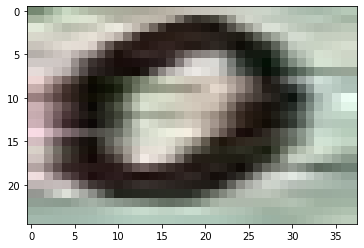



Prediction:  2


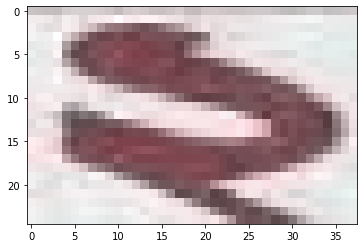



Prediction:  8


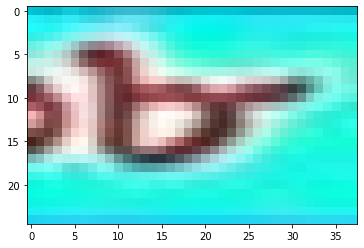



Prediction:  2


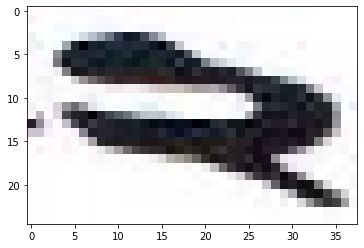



Prediction:  4


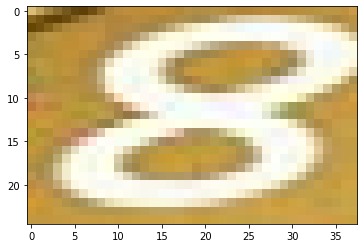



Prediction:  9


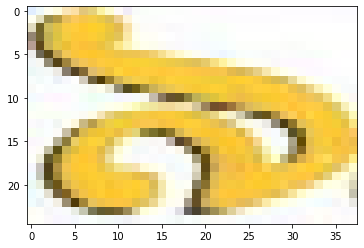



Prediction:  0


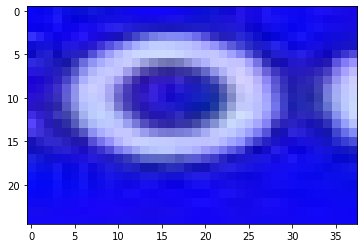



Prediction:  3


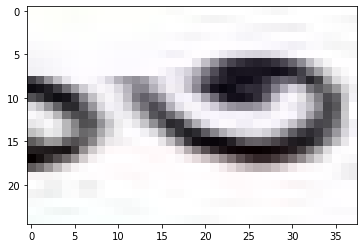



Prediction:  3


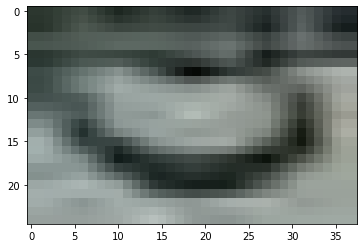



Prediction:  8


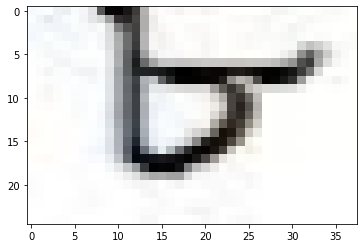



Prediction:  3


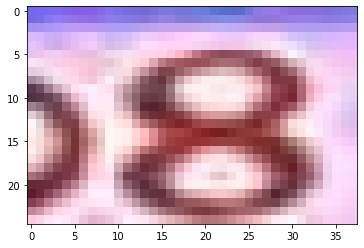



Prediction:  1


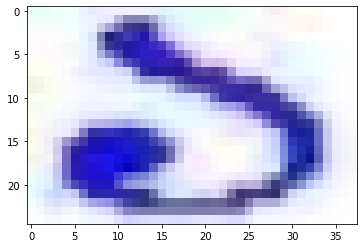



Prediction:  1


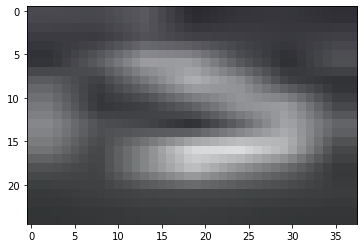



Prediction:  8


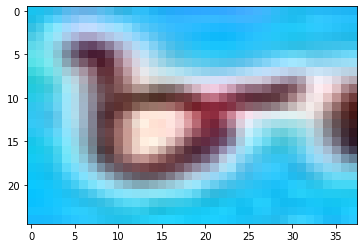



Prediction:  8


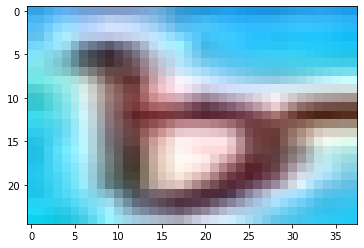



Prediction:  0


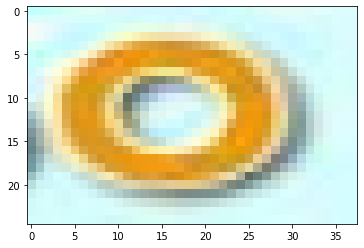



Prediction:  2


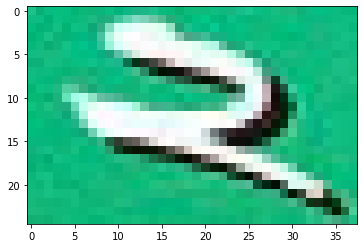



Prediction:  8


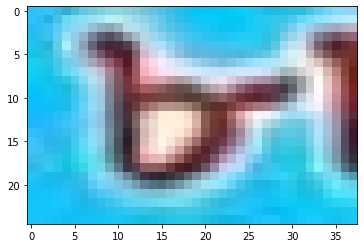



Prediction:  0


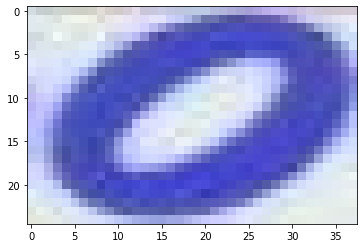



Prediction:  5


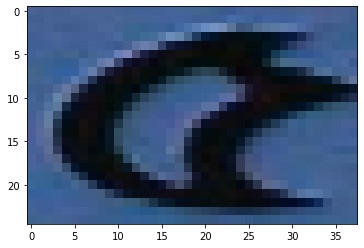

In [18]:
for i in range(20):
    print('Prediction: ', output[i])
    plt.imshow(x_test[i])
    plt.show()
    print('\n')